In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',infer_datetime_format=True,low_memory=True)

In [3]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
df=pd.get_dummies(data=df, columns=['cbwd'])

In [5]:
df['Date']=pd.to_datetime(df[['day','month','year','hour']])

In [6]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,Date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,1.79,0,0,0,1,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,4.92,0,0,0,1,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,6.71,0,0,0,1,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,9.84,0,0,0,1,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,12.97,0,0,0,1,0,0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0,2014-12-31 19:00:00
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0,2014-12-31 20:00:00
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0,2014-12-31 21:00:00
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0,2014-12-31 22:00:00


In [7]:
df=df.drop(columns=['year','No','day','hour','month'])

In [8]:
df

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,Date
0,NaN,-21,-11.0,1021.0,1.79,0,0,0,1,0,0,2010-01-01 00:00:00
1,NaN,-21,-12.0,1020.0,4.92,0,0,0,1,0,0,2010-01-01 01:00:00
2,NaN,-21,-11.0,1019.0,6.71,0,0,0,1,0,0,2010-01-01 02:00:00
3,NaN,-21,-14.0,1019.0,9.84,0,0,0,1,0,0,2010-01-01 03:00:00
4,NaN,-20,-12.0,1018.0,12.97,0,0,0,1,0,0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0,2014-12-31 19:00:00
43820,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0,2014-12-31 20:00:00
43821,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0,2014-12-31 21:00:00
43822,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0,2014-12-31 22:00:00


In [9]:
df.set_index('Date',inplace=True)

In [10]:
df

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
Date,,,,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,1.79,0,0,0,1,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,4.92,0,0,0,1,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,6.71,0,0,0,1,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,9.84,0,0,0,1,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,12.97,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0


In [11]:
df=df.fillna(method='bfill')

In [13]:
df.isna().sum()

pm2.5      0
DEWP       0
TEMP       0
PRES       0
Iws        0
Is         0
Ir         0
cbwd_NE    0
cbwd_NW    0
cbwd_SE    0
cbwd_cv    0
dtype: int64

In [14]:
df.describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,98.722504,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916,0.114024,0.322882,0.348896,0.214198
std,91.415963,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867,0.317844,0.467584,0.476626,0.410269
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,138.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df=df.reset_index(drop=True)
df

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,129.0,-21,-11.0,1021.0,1.79,0,0,0,1,0,0
1,129.0,-21,-12.0,1020.0,4.92,0,0,0,1,0,0
2,129.0,-21,-11.0,1019.0,6.71,0,0,0,1,0,0
3,129.0,-21,-14.0,1019.0,9.84,0,0,0,1,0,0
4,129.0,-20,-12.0,1018.0,12.97,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
43820,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
43821,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
43822,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0


In [27]:
df=df.drop(columns=['TEMP'])

In [28]:
df

,pm2.5,DEWP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,129.0,-21,1021.0,1.79,0,0,0,1,0,0
1,129.0,-21,1020.0,4.92,0,0,0,1,0,0
2,129.0,-21,1019.0,6.71,0,0,0,1,0,0
3,129.0,-21,1019.0,9.84,0,0,0,1,0,0
4,129.0,-20,1018.0,12.97,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,1034.0,231.97,0,0,0,1,0,0
43820,10.0,-22,1034.0,237.78,0,0,0,1,0,0
43821,10.0,-22,1034.0,242.70,0,0,0,1,0,0
43822,8.0,-22,1034.0,246.72,0,0,0,1,0,0


# Splitting

In [29]:
def traintest_split(dataset):
    x=35064
    train_data=dataset[:x]
    test_data=dataset[x:]
    return train_data,test_data

In [30]:
print("Time-series hourly data")
train_data,test_data=traintest_split(df)
print(train_data.shape)
print(test_data.shape)

Time-series hourly data
(35064, 10)
(8760, 10)


# **Scaling**

In [31]:
def scaling(train,test):
  scaler=MinMaxScaler(feature_range=(0,1))
  a=scaler.fit_transform(train)
  b=scaler.transform(test)
  return a,b

In [32]:
scaler=MinMaxScaler(feature_range=(0,1))
a=scaler.fit_transform(train_data)
b=scaler.transform(test_data)

In [33]:
scaled_train_data,scaled_test_data=scaling(train_data,test_data)

In [34]:
print(scaled_train_data.shape)
print(scaled_test_data.shape)

(35064, 10)
(8760, 10)


# **Supervised Form**

In [35]:
def series_to_supervised(dataset,look_back,horizon):
  x=[]
  y=[]
  for i in range(len(dataset)):
    # find the end of this pattern
    end_ix = i + look_back
    # check if we are beyond the dataset
    if end_ix > len(dataset)-horizon:
      break
    # gather input and output parts of the pattern
    data_x, data_y = dataset[i:end_ix,0:], dataset[end_ix:end_ix+horizon,0]
    x.append(data_x)
    y.append(data_y)
  return np.array(x), np.array(y)

In [44]:
horizon=12
x_train1,y_train1=series_to_supervised(scaled_train_data,12,horizon)
x_test1,y_test1=series_to_supervised(scaled_test_data,12,horizon)

In [45]:
n_input = 120
x_train1 = x_train1.reshape(x_train1.shape[0], n_input)
x_test1= x_test1.reshape(x_test1.shape[0],n_input)

In [46]:
y_train1=y_train1[:,11]
y_test1=y_test1[:,11]

In [47]:
print("x_train  " + str(x_train1.shape))
print("y_train  " + str(y_train1.shape))
print("x_test  " + str(x_test1.shape))
print("y_test  " + str(y_test1.shape))

x_train  (35041, 120)
y_train  (35041,)
x_test  (8737, 120)
y_test  (8737,)


# SVR

In [40]:
model1 = SVR(kernel = 'rbf',verbose=True,C=1.0,epsilon=0.1)
model1.fit(x_train1, y_train1)

[LibSVM]

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

# Train

In [59]:
y_pred_train=model1.predict(x_train1)

In [60]:
y_pred_train=y_pred_train.reshape(-1,1)

In [61]:
y_pred_train.shape

(35041, 1)

In [62]:
forecast_copies = np.repeat(y_pred_train,10, axis=-1)
y_pred_train = scaler.inverse_transform(forecast_copies)[:,0]

In [63]:
df_train_predicted=pd.DataFrame(data=y_pred_train, columns=['Predicted_train'])

In [64]:
actual_copies = np.repeat(y_train1.reshape(-1,1), 10, axis=-1)
y_actual_train = scaler.inverse_transform(actual_copies)[:,0]

In [65]:
df_train_actual=pd.DataFrame(data=y_actual_train ,columns=['Actual_train'])
df_train_actual

,Actual_train
0,129.0
1,129.0
2,148.0
3,159.0
4,181.0
...,...
35036,22.0
35037,18.0
35038,23.0
35039,20.0


In [66]:
df1=pd.concat([df_train_actual,df_train_predicted],axis=1)
df1

,Actual_train,Predicted_train
0,129.0,105.183534
1,129.0,110.216493
2,148.0,111.811963
3,159.0,113.137529
4,181.0,134.297304
...,...,...
35036,22.0,121.676374
35037,18.0,88.720571
35038,23.0,96.959632
35039,20.0,88.841585


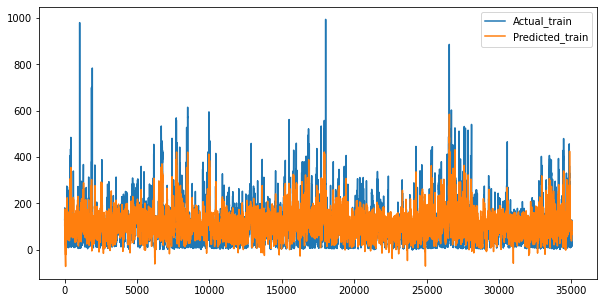

In [67]:
df1.plot(figsize=(10,5))

In [68]:
import math
trainScore = math.sqrt(mean_squared_error(df1['Actual_train'],df1['Predicted_train']))
print('Train Score: %.5f RMSE' % (trainScore))
trainScore1 =mean_absolute_error(df1['Actual_train'],df1['Predicted_train'])
print('Train Score: %.5f MSE' % (trainScore1))

Train Score: 68.00182 RMSE
Train Score: 55.80326 MSE


# Test

In [69]:
y_pred_test=model1.predict(x_test1)

In [70]:
y_pred_test=y_pred_test.reshape(-1,1)

In [71]:
forecast_copies = np.repeat(y_pred_test, 10, axis=-1)
y_pred_test = scaler.inverse_transform(forecast_copies)[:,0]

In [72]:
df_test_predicted=pd.DataFrame(data=y_pred_test, columns=['Predicted'])

In [73]:
actual_copies = np.repeat(y_test1.reshape(-1,1), 10, axis=-1)
y_actual_test = scaler.inverse_transform(actual_copies)[:,0]

In [74]:
df_test_actual=pd.DataFrame(data=y_actual_test ,columns=['Actual'])
df_test_actual

,Actual
0,111.0
1,144.0
2,170.0
3,174.0
4,174.0
...,...
8732,8.0
8733,10.0
8734,10.0
8735,8.0


In [75]:
df2=pd.concat([df_test_actual,df_test_predicted],axis=1)
df2

,Actual,Predicted
0,111.0,78.724491
1,144.0,62.718774
2,170.0,92.242212
3,174.0,74.764186
4,174.0,84.172331
...,...,...
8732,8.0,64.219359
8733,10.0,68.268119
8734,10.0,70.453163
8735,8.0,78.563010


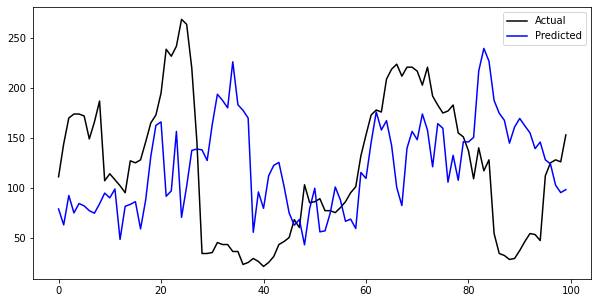

In [76]:
df2['Actual'][:100].plot(figsize=(10,5),c='black',label='Actual')
df2['Predicted'][:100].plot(figsize=(10,5),c='blue',label='Predicted')
plt.legend()
plt.show()

In [77]:
import math
testScore = math.sqrt(mean_squared_error(df2['Actual'],df2['Predicted']))
print('Test Score: %.5f RMSE' % (testScore))
testScore1 =mean_squared_error(df2['Actual'],df2['Predicted'])
print('Test Score: %.5f MSE' % (testScore1))

Test Score: 78.83081 RMSE
Test Score: 6214.29591 MSE


In [81]:
from sklearn.metrics import mean_absolute_error

In [82]:
import math
testScore2 = mean_absolute_error(df2['Actual'],df2['Predicted'])
print('Test Score: %.5f MAE' % (testScore2))

Test Score: 61.44755 MAE
